## First steps 

In [1]:
import pandas as pd
import numpy as np
import geopandas as geo
import matplotlib.pyplot as plt
import seaborn as sns
import formulas as f
import requests as r


from geopy.geocoders import Nominatim
from pycountry_convert import country_name_to_country_alpha2

In [2]:
sharks_df = pd.read_csv('attacks.csv', encoding='latin1')

### 1 Clean DF and Null values

In [3]:
#Count nulls

sharks_df_null = sharks_df.isnull().sum()
sharks_df_null

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [4]:
#Porcentaje de nulos en cada columna, ordenados de mayor a menor.

perc = lambda x: (x/len(sharks_df))*100
sharks_null_perc = sharks_df_null.apply(perc)
sharks_null_perc = sharks_null_perc.round(2)
sharks_null_perc.sort_values()

Case Number                66.17
original order             75.47
Date                       75.50
Case Number.2              75.50
Case Number.1              75.50
href                       75.50
href formula               75.50
pdf                        75.50
Year                       75.51
Type                       75.52
Investigator or Source     75.57
Injury                     75.61
Country                    75.69
Name                       76.32
Area                       77.27
Fatal (Y/N)                77.60
Location                   77.60
Activity                   77.62
Sex                        77.70
Age                        86.51
Species                    86.53
Time                       88.54
Unnamed: 23                99.99
Unnamed: 22               100.00
dtype: float64

Columnas 'Unnamed 22' y 'Unnamed 23' Tienen un gran procentaje de nulos.

Ahora veremos que tipo de información nos dan 

In [5]:
#Nulls Unnamed 22
sharks_df[sharks_df['Unnamed: 22'].notnull() == True]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [6]:
#Nulls Unnamed 23
sharks_df[sharks_df['Unnamed: 23'].notnull() == True]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


## 2 Duplicates and filtering

Data Manipulation

In [7]:
#remove duplicates with null data, a lot of row null without data.

sharks = sharks_df.drop_duplicates()

In [8]:
#Taking out Unnamed 22 and Unnamed 23

sharks = sharks[['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order']]

In [9]:
#Rename columns removing spaces.

sharks.columns = [x.strip(' ') for x in sharks.columns] 

In [10]:
# Change spaces with a  _ of each element in a list
#sharks_df.columns = [x.replace(" ", "_") for x in sharks_df.columns] 
#sharks_df.columns

In [11]:
#Removing spaces from the sides.

sharks = sharks.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [12]:
#Deleting last 3 rows, No useful info

sharks = sharks[:-10]

In [13]:
#fill null with 'empty'

sharks.Activity.fillna('empty')

0           Paddling
1           Standing
2            Surfing
3            Surfing
4        Free diving
            ...     
6297          Diving
6298    Pearl diving
6299        Swimming
6300           empty
6301        Swimming
Name: Activity, Length: 6302, dtype: object

## 3 DataFrame Classification

Classifying data according to the activities during the attack.

In [14]:
swimming = ['Swim', 'diving', 'Scallop', 'Cave divinig', 'fotography', 'sparefishing', 'snorkeling', 'filming']
surfing = ['Surfing', 'Windsurfing', 'Body boarding', 'Paddle-skiing', 'Kite', 'Kayak', 'Paddle', 'Rowing']
fishing = ['Fish', 'Lobster', 'Cleaning', 'Fishing', 'fish']

In [15]:
#Classification per Swimming activities
swim = f.concat_df(swimming, sharks, 'Activity')
swim['Activity'] = 'Swimming activity or related'

In [16]:
#Classification per surfing activities
surf = f.concat_df(surfing, sharks, 'Activity')
surf['Activity'] = 'Surfing activity or related'

In [17]:
#Classification per fishing activities
fish = f.concat_df(fishing, sharks, 'Activity')
fish['Activity'] = 'Fishing activity or related'

In [18]:
#Joinning data
listed = [swim, surf, fish]
df = pd.concat(listed)

#For World map and alpha
df.Country = df.Country.str.capitalize()

In [19]:
#Fillna according to the case number.
df['Year'].fillna(2017.0,inplace=True)

In [20]:
df=df[['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species']]
df.Country = df.Country.str.title()

In [21]:
#Filter for last 50 years


## 4 Counts

Count values per interesing columns.

In [22]:
#Attacks per country
df['Country'].value_counts()

Usa                 2279
Australia           1489
South Africa         700
Papua New Guinea     198
Bahamas              187
                    ... 
Red Sea?               1
West Indies            1
Algeria                1
Egypt / Israel         1
Falkland Islands       1
Name: Country, Length: 151, dtype: int64

In [23]:
#Attacks per Area
df['Area'].value_counts()

Florida                  960
New South Wales          500
California               392
Hawaii                   359
Western Cape Province    303
                        ... 
Shanghai                   1
East Wall                  1
Guam                       1
Oslo Fjord                 1
Pennsylvania               1
Name: Area, Length: 545, dtype: int64

In [24]:
#attacks per Activity
df['Activity'].value_counts()

Fishing activity or related     3643
Swimming activity or related    1818
Surfing activity or related     1355
Name: Activity, dtype: int64

In [25]:
df['Type'].value_counts()

Unprovoked      4595
Provoked        1072
Invalid          459
Boating          382
Boat             242
Sea Disaster      56
Boatomg            3
Questionable       2
Name: Type, dtype: int64

In [26]:
df['Injury'].value_counts()

FATAL                                                         608
No injury                                                      97
Leg bitten                                                     87
Foot bitten                                                    80
Survived                                                       64
                                                             ... 
Bitten by shark, but  repelled it with his 'skandalopetra'      1
Severe lacerations to right shoulder & arm                      1
Left thigh bitten, FATAL                                        1
Lacerations to right arm & chest                                1
FATAL, left thigh & hip bitten                                  1
Name: Injury, Length: 2578, dtype: int64

In [27]:
df['Location'].value_counts()

New Smyrna Beach, Volusia County            130
Daytona Beach, Volusia County                19
Melbourne Beach, Brevard County              18
Ponce Inlet, Volusia County                  17
Florida Keys, Monroe County                  15
                                           ... 
Pincushion, north of Maroochydore Beach       1
Clam Beach, near Eureka, Humboldt County      1
Aulong Channel                                1
St. Croix, Cane Bay                           1
Freetown                                      1
Name: Location, Length: 2955, dtype: int64

In [28]:
df['Time'].value_counts()

Afternoon    195
12h00        167
11h00        151
Morning      144
14h00        116
            ... 
17h17          1
16h35          1
09h05          1
19h28          1
22h30          1
Name: Time, Length: 298, dtype: int64

## 5 Grouping data

### 5.1 GroupBy por Countries

In [29]:
#Para el mapa
t = df.groupby(by=['Country'], as_index=False).agg('count')[['Country', 'Case Number']]

#Rename column to count
t = t.rename(columns={'Case Number':'Count'})

#Delete spaces from left and right
t.Country = t.Country.str.title()

In [30]:
t = t.sort_values(by='Count')
t = t[t['Count'] > 10]

In [31]:
#Countries not detected by the alpha, not typed correctly
corrections = {
'Columbia': 'Colombia', 'Scotland':'United Kingdom', 'England':'United Kingdom','New Britain':'Papua New Guinea',
'New Guinea': 'Papua New Guinea', 'North Sea':'United Kingdom', 'Reunion':'Réunion', 'Usa':'USA'
}

In [32]:
country_ab = []

for i in t.Country:

    if i in corrections.keys():
        i = corrections[i]
        country_ab.append(country_name_to_country_alpha2(i))
    else:
        country_ab.append(country_name_to_country_alpha2(i))
        
        


t['Country AB'] = country_ab


In [33]:
t = t[['Country', 'Count', 'Country AB']]
t.sort_values(by='Count', ascending=False, inplace=True)
t = t.head(10)

### 5.2 Group By Years

In [34]:
#GroupBy Fechas

fechas = df.groupby(by=['Year'], as_index=False).agg('count')[['Year', 'Case Number']]


#Desde el 1990 hasta la fecha
fechas[fechas['Case Number'] > 10].sort_values('Case Number')
fechas = fechas[fechas['Year'] > 1990].sort_values('Case Number')


En el 2015 cada 2 días moria una persona por ataques de tiburones haciendo actividades como Surfing, Fishing o Swimming. 

Since 1990 to 2018 (Last year of the Data base) The sharks attacks are been increasing

In [35]:
# FIltering from 1990 to 2018
df = df[df['Year'] > 1990]

## 6 World Map

In [36]:
geolocator = Nominatim(user_agent='Iron Shark')
geolocator

In [37]:
#Countries Latitude 
lat=[]

for i in t['Country AB']:
    if i not in ['SC', 'IL', 'NC'] :
        lat.append(geolocator.geocode(i, timeout=None).latitude) 
        
    #New Caledonia different alpha ISO    
    elif i in 'NC':
        lat.append(geolocator.geocode('FR-NC', timeout=None).latitude)
    else: 
        lat.append(geolocator.geocode(i, timeout=None, country_codes=i).latitude)
        
t['Latitude'] = lat       

In [38]:
#Countries Longitude
long=[]

for i in t['Country AB']:
    if i not in ['SC', 'IL', 'NC'] :
        long.append(geolocator.geocode(i, timeout=None).longitude) 
        
    #New Caledonia different alpha ISO    
    elif i in 'NC':
        long.append(geolocator.geocode('FR-NC', timeout=None).longitude)
    else: 
        long.append(geolocator.geocode(i, timeout=None, country_codes=i).longitude)
        
t['Longitude'] = long   


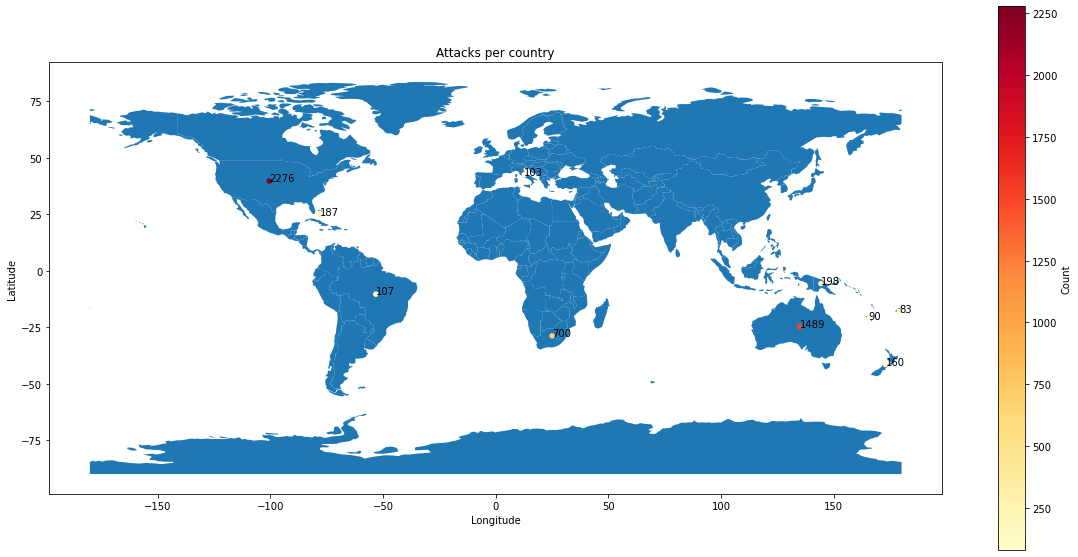

In [39]:
#Plot DataFrame
fig, ax = plt.subplots(figsize=(20,10))

countries = geo.read_file(geo.datasets.get_path("naturalearth_lowres")).plot(ax=ax)

plots = t.plot(x='Longitude', y='Latitude', kind='scatter', c='Count', colormap="YlOrRd", ax=ax, title='Attacks per country')
[plots.text(t.iloc[i][-1], t.iloc[i][-2], t.iloc[i][1]) for i in range(len(t))]

plt.show()

## Visualizations

Graphics for important data.

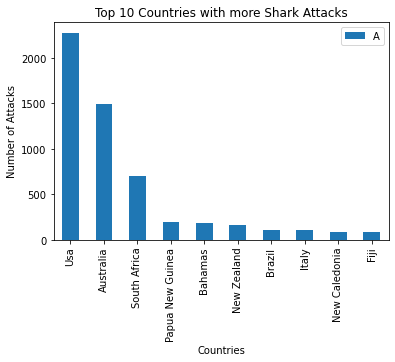

In [40]:
#Barplot per countries

countries_bar = t.plot.bar(xlabel = 'Countries', ylabel='Number of Attacks', y='Count', x='Country', title='Top 10 Countries with more Shark Attacks')
countries_bar.legend('Attacks')
plt.show()

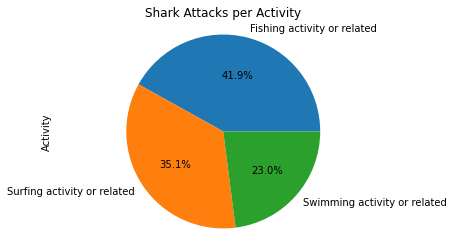

In [41]:
# Barplot per activity

activity_bar = df.Activity.value_counts().plot.pie(title='Shark Attacks per Activity', autopct='%1.1f%%')
activity_bar.axis('equal')

plt.show()

In [42]:
top = df[df.Country.isin(list(t.Country))]

In [43]:
#Top 10 Crosstab country per area and activity

countries_activitiescrosstab = pd.crosstab(index=[top["Country"],top["Area"]],columns=[top["Activity"]], margins=True).sort_values(['All', 'Country'], ascending=False)
countries_activitiescrosstab


Activity                           Fishing activity or related  \
Country   Area                                                   
All                                                        907   
Usa       Florida                                          154   
          California                                        66   
Australia New South Wales                                   51   
Usa       Hawaii                                            50   
...                                                        ...   
Bahamas   Bimini                                             0   
          Cat Cay                                            0   
          New Providence District                            0   
          Northern Bahamas                                   0   
Australia Torres Strait                                      0   

Activity                           Surfing activity or related  \
Country   Area                                                   
All                                                        957   
Usa       Florida                                          334   
          California                                       100   
Australia New South Wales                                  102   
Usa       Hawaii                                            86   
...                                                        ...   
Bahamas   Bimini                                             0   
          Cat Cay                                            0   
          New Providence District                            0   
          Northern Bahamas                                   0   
Australia Torres Strait                                      0   

Activity                           Swimming activity or related   All  
Country   Area                                                         
All                                                         516  2380  
Usa       Florida                                           125   613  
          California                                         24   190  
Australia New South Wales                                    34   187  
Usa       Hawaii                                             49   185  
...                                                         ...   ...  
Bahamas   Bimini                                              1     1  
          Cat Cay                                             1     1  
          New Providence District                             1     1  
          Northern Bahamas                                    1     1  
Australia Torres Strait                                       1     1  

[91 rows x 4 columns]

Text(0.5, 1.0, 'Shark Attacksk per Activity')

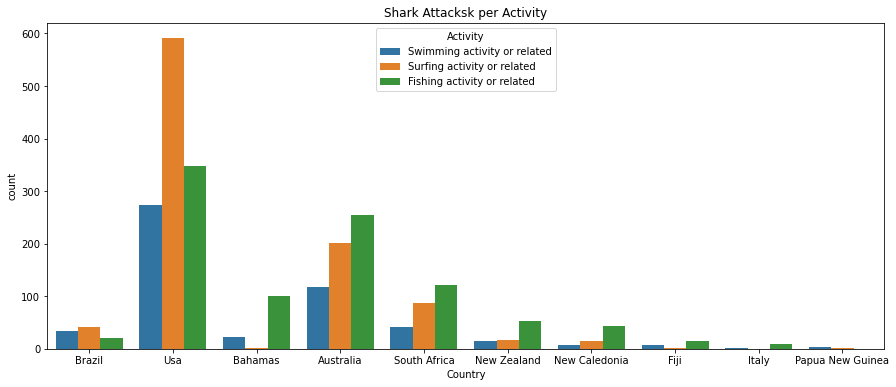

In [44]:
#counter plot 

fig, ax = plt.subplots(figsize=(15, 6))

country__hue = sns.countplot(x=top['Country'], hue=top['Activity'], ax=ax)
country__hue.set_title('Shark Attacksk per Activity')


In [45]:

grop = top.groupby(['Country', 'Year']).agg('count')[['Case Number']]
grop = grop.unstack(fill_value=0)
grop.head(10)

Case Number                                                   \
Year                  1991.0 1992.0 1993.0 1994.0 1995.0 1996.0 1997.0 1998.0   
Country                                                                         
Australia                  4      5     15      4      4     11      8      6   
Bahamas                    3      3      3      3      0      1      6      3   
Brazil                     3      5      3     10      4      3      5      4   
Fiji                       0      1      0      0      0      0      1      0   
Italy                      0      0      0      0      0      0      0      3   
New Caledonia              0      0      5      3      0      3      0      2   
New Zealand                0      1      0      0      3      1      0      0   
Papua New Guinea           0      0      0      0      0      1      0      0   
South Africa               4      5      4     16      3      6      7     23   
Usa                       27     32     17     20     39     23     30     28   

                                ...                                            \
Year             1999.0 2000.0  ... 2009.0 2010.0 2011.0 2012.0 2013.0 2014.0   
Country                         ...                                             
Australia             6     21  ...     32     25     28     32     30     43   
Bahamas               3      0  ...      9      3      2      4     16      7   
Brazil                9      0  ...      2      1      3      1      1      3   
Fiji                  0      1  ...      0      2      5      3      0      0   
Italy                 3      0  ...      0      0      0      0      0      0   
New Caledonia         3      3  ...      1      0      4      0      1      2   
New Zealand           9      6  ...     13      4      1      2      4      5   
Papua New Guinea      0      1  ...      0      0      3      0      0      0   
South Africa          7      5  ...     13      6     20      7     10      7   
Usa                  30     42  ...     43     48     50     67     57     62   

                                              
Year             2015.0 2016.0 2017.0 2018.0  
Country                                       
Australia            39     49     32     24  
Bahamas               8      5     10      2  
Brazil                2      2      1      9  
Fiji                  3      1      0      0  
Italy                 1      0      0      0  
New Caledonia         1      9      0      5  
New Zealand           0      3      2      0  
Papua New Guinea      0      0      0      0  
South Africa         15      7     10      5  
Usa                  77     64     61      7  

[10 rows x 28 columns]